## 기본적인 전처리가 진행된 데이터를 평균이라는 기본적인 통계량을 통해 살펴보자.
- 기본적인 column들의 특징 파악

In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import *
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
df = pd.read_csv('./data/서울생활이동_전처리데이터.csv', index_col= 0)

In [6]:
df.head()

,대상연월,요일,성별,나이,평균 이동 시간(분),이동인구(합),출발 지역명,도착 지역명
0,202306,월,F,25,35,16,종로구,종로구
1,202306,월,F,30,14,24,종로구,종로구
2,202306,월,F,35,7,18,종로구,종로구
3,202306,월,F,40,19,27,종로구,종로구
4,202306,월,F,45,15,16,종로구,종로구


In [7]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 16016624 entries, 0 to 16016623
Data columns (total 8 columns):
 #   Column       Non-Null Count     Dtype 
---  ------       --------------     ----- 
 0   대상연월         16016624 non-null  int64 
 1   요일           16016624 non-null  object
 2   성별           16016624 non-null  object
 3   나이           16016624 non-null  int64 
 4   평균 이동 시간(분)  16016624 non-null  int64 
 5   이동인구(합)      16016624 non-null  int64 
 6   출발 지역명       16016624 non-null  object
 7   도착 지역명       16016624 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.1+ GB


### '총 이동시간의 합' 에 대한 고민이 있었음. => 하나의 row에 작성된 이동인구(합)의 의미를 적용하기 위해

- 해당 내용에 대해 생각 정리가 잘 안되고 설명이 모호해서 서칭
- 출처[평균의 평균, 과연 전체 평균과 같을까요?] https://ballpen.blog/%ED%8F%89%EA%B7%A0%EC%9D%98-%ED%8F%89%EA%B7%A0-%EA%B3%BC%EC%97%B0-%EC%A0%84%EC%B2%B4-%ED%8F%89%EA%B7%A0%EA%B3%BC-%EA%B0%99%EC%9D%84%EA%B9%8C%EC%9A%94/


In [8]:
# 데이터에 있는 모든 이동시간의 합
# 그냥 df['평균 이동 시간(분)'].mean() 은 다른 결과가 나온다.
(df['평균 이동 시간(분)'] * df['이동인구(합)']).sum() / df['이동인구(합)'].sum()

62.86928815903505

In [9]:
# 각 row마다 인원수가 다르기 때문에 모든 인구수를 반영한 평균값과 다르다.
df['평균 이동 시간(분)'].mean()

61.291843462142836

#### ** 모든 출근자들의 평균 이동시간: 평균적으로 출근 시 약 63분의 시간을 소요한다.

### 각 column 들의 기본적인 통계량 파악

#### 데이터에 있는 전체 이동 인구수

In [10]:
df['이동인구(합)'].sum()

134917425

#### 요일별 출근인원 수

In [11]:
dow = df.groupby('요일')['이동인구(합)'].sum()
dow = dow.reindex(['월','화','수','목','금'])
dow

요일
월    25346431
화    27060096
수    28578099
목    28143744
금    25789055
Name: 이동인구(합), dtype: int64

(15000000.0, 30007003.95)

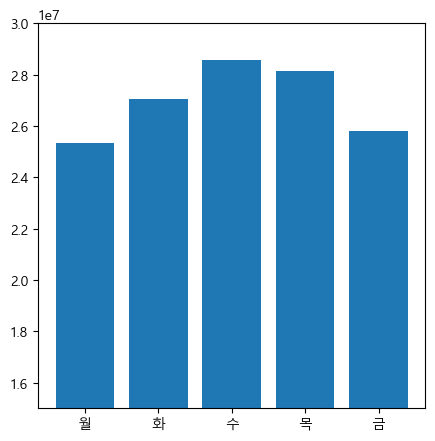

In [12]:
plt.figure(figsize=(5,5))
plt.bar(dow.index, dow.values, )
plt.ylim(15000000,)

#### **요일에 따른 출근 인원 수의 차이가 약간 있음. 25,300,000 ~ 28,500,000 명 사이 정도

- 월요일과 금요일이 화~목 보다 전체 출근인원이 적은 이유는 일반적으로 연차사용을 월요일 또는 금요일에 많이 하기 때문인 것으로 추청

#### 요일 별 출근 소요시간 평균
- 다른 column들의 이동시간 평균 또는 통계량을 구하는 것 까지 고려해서 작업이 용이하도록, '인구수반영 총 시간' column 추가

In [13]:
df['인구수반영 총 시간'] = df['이동인구(합)'] * df['평균 이동 시간(분)']

# groupby를 '요일' 기준으로 진행하고 sum으로 더한 값을 나누어 각 요일별 평균 이동시간을 구함
dow_gtw = df.groupby('요일')['인구수반영 총 시간'].sum() / df.groupby('요일')['이동인구(합)'].sum()

In [14]:
dow_gtw = dow_gtw.reindex(['월','화','수','목','금'])

In [15]:
dow_gtw

요일
월    62.721994
화    63.398308
수    63.591653
목    63.250257
금    61.242720
dtype: float64

<BarContainer object of 5 artists>

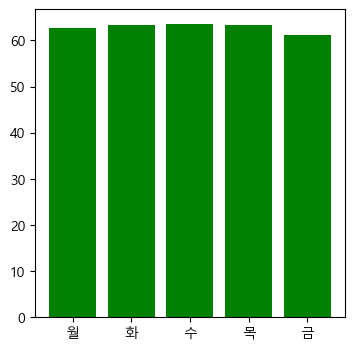

In [16]:
plt.figure(figsize=(4,4))
plt.bar(dow_gtw.index, dow_gtw.values, color='g')

#### **요일별 출근 소요시간의 편차는 거의 없다고 판단 가능.

#### 성별에 따른 출근인원 수

In [17]:
gender = df.groupby('성별')['이동인구(합)'].sum()
gender

성별
F    72459323
M    62458102
Name: 이동인구(합), dtype: int64

<BarContainer object of 2 artists>

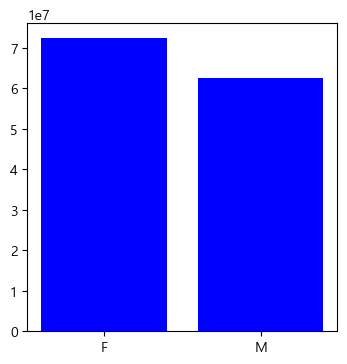

In [18]:
plt.figure(figsize=(4,4))
plt.bar(gender.index, gender.values, color='b')

#### ** 출근인원 수는 여성이 남성보다 조금 더 많다
- 개인적인 예상으로는 남성이 주로 근무하는 제조업 관련 회사들은 서울보다는 다른 지역에 많이 분포해 있기 때문인 것으로 추정

#### 성별에 따른 출근 소요시간 평균

In [19]:
gender_gtw = df.groupby('성별')['인구수반영 총 시간'].sum() / df.groupby('성별')['이동인구(합)'].sum()

In [20]:
gender_gtw

성별
F    60.380154
M    65.757000
dtype: float64

<BarContainer object of 2 artists>

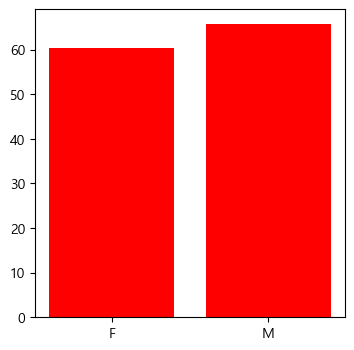

In [21]:
plt.figure(figsize=(4,4))
plt.bar(gender_gtw.index, gender_gtw.values, color='r')

#### ** 출근 소요시간은 차이가 거의 없다 (평균 약 5분 남자가 더 소요)

#### 나이대 별 출근인원 수

In [22]:
age = df.groupby('나이')['이동인구(합)'].sum()
age

나이
20     7695066
25    16826141
30    17240083
35    14719403
40    15633585
45    13466503
50    13791879
55    10827524
60     9609322
65     6473156
70     3448234
75     2352904
80     2833625
Name: 이동인구(합), dtype: int64

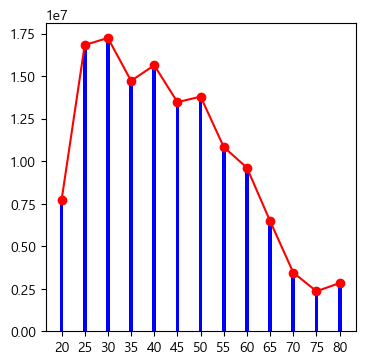

In [23]:
plt.figure(figsize=(4,4))
plt.bar(age.index, age.values, color='b')
plt.plot(age.index, age.values, color='r', marker='o')
plt.xticks(age.index)
plt.show()

#### ** 출근인원수 Top7 의 나이대는 25 ~ 54세이다.
- 사회활동을 가장 많이 하는 나이대라는 선입견에 알맞는 결과

#### 나이대 별 출근 소요시간 평균

In [24]:
age_gtw = df.groupby('나이')['인구수반영 총 시간'].sum() / df.groupby('나이')['이동인구(합)'].sum()

In [25]:
age_gtw

나이
20    62.923857
25    70.324531
30    69.232455
35    65.925551
40    65.400465
45    63.533266
50    61.971241
55    57.036907
60    53.906966
65    51.995965
70    51.469256
75    51.843831
80    51.657774
dtype: float64

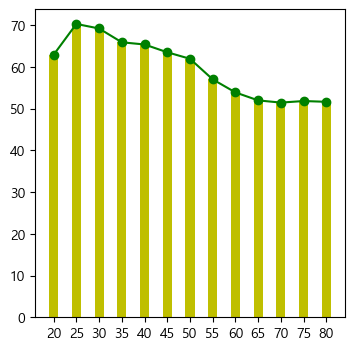

In [26]:
plt.figure(figsize=(4,4))
plt.bar(age_gtw.index, age_gtw.values, width=2, color='y')
plt.plot(age_gtw.index, age_gtw.values, color='g', marker='o')
plt.xticks(age_gtw.index)
plt.show()

#### ** 20~24세 를 제외하고는 나이가 많아질 수록 평균 출근 소요시간이 적어지는 경향을 발견.
- 20 ~ 24세는 출근 보다는 대학교 통학의 경우가 많을 것이라 예측(자취생). 하지만 해당 데이터를 제외하기엔 통학하는 인구수가
- 출근시간에도 영향을 미친다는 점. 통학이 아니라 출근을 하는 경우도 많이 있을 수 있다는 점 때문에 해당 데이터도 사용

#### 대상연월 별 출근인원 수
- 데이터 취합 연월(2023년 4월 ~ 2023년 6월)간의 차이가 있는지 확인

In [27]:
yearm = df.groupby('대상연월')['이동인구(합)'].sum()
yearm

대상연월
202304    43969497
202305    45623590
202306    45324338
Name: 이동인구(합), dtype: int64

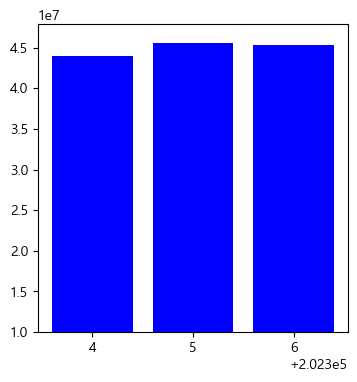

In [28]:
plt.figure(figsize=(4,4))
plt.bar(yearm.index, yearm.values, color='b')
plt.ylim(10000000)
plt.xticks(yearm.index)
plt.show()

#### ** 대상연월에 따른 출근인원 수의 차이는 없다고 판단. (휴가철이나 연말 연초 데이터가 포함되지 않아서 그런 것으로 추정)

#### 대상연월 별 출근 소요시간 평균

In [29]:
yearm_gtw = df.groupby('대상연월')['인구수반영 총 시간'].sum() / df.groupby('대상연월')['이동인구(합)'].sum()

In [30]:
yearm_gtw

대상연월
202304    63.366298
202305    62.446100
202306    62.813117
dtype: float64

<BarContainer object of 3 artists>

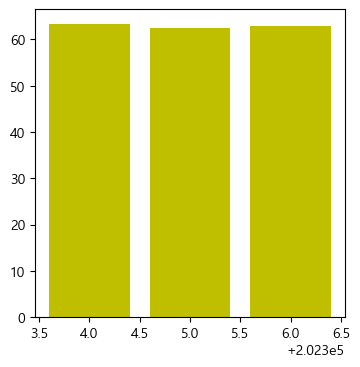

In [31]:
plt.figure(figsize=(4,4))
plt.bar(yearm_gtw.index, yearm_gtw.values, color='y')

#### ** 출근 소요시간 또한 월별 차이는 없다고 판단

### 지역별 출근인원 수
- 도착지를 기준으로 진행

In [33]:
desti = df.groupby('도착 지역명')['이동인구(합)'].sum()
desti.sort_values(ascending=False, inplace=True)

In [34]:
desti

도착 지역명
강남구     19389477
중구      11130936
서초구     10790503
영등포구     8898643
송파구      8144651
종로구      7710910
마포구      6748847
강서구      5420870
성동구      5122709
구로구      4803432
용산구      4155918
금천구      4104314
서대문구     4026569
동대문구     3714319
강동구      3689478
관악구      3545026
성북구      3371161
노원구      3310315
광진구      3232643
동작구      2849174
중랑구      2490320
은평구      2355840
양천구      2151386
강북구      2114777
도봉구      1645207
Name: 이동인구(합), dtype: int64

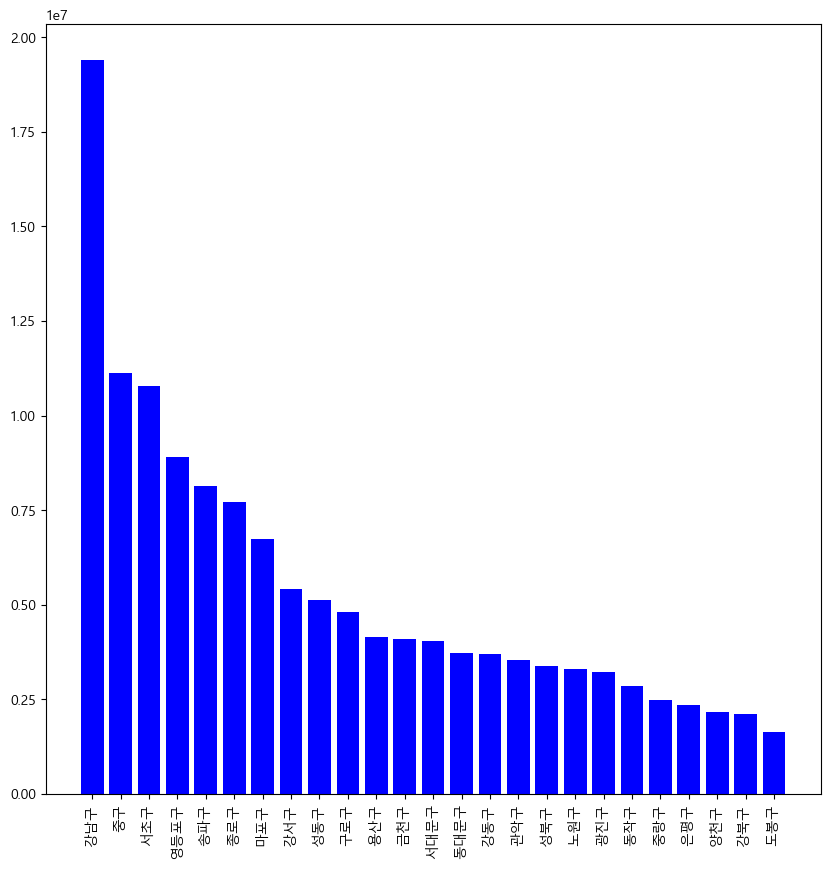

In [35]:
plt.figure(figsize=(10,10))
plt.bar(desti.index, desti.values, color='b')
plt.xticks(rotation=90)
plt.show()

#### ** 지역별 출근인원 수는 강남이 눈에 띄게 많다는 것을 알 수 있다.

#### 지역별 출근 소요시간 평균

In [36]:
desti_gtw = df.groupby('도착 지역명')['인구수반영 총 시간'].sum() / df.groupby('도착 지역명')['이동인구(합)'].sum()

In [37]:
desti_gtw.sort_values(ascending=False, inplace=True)

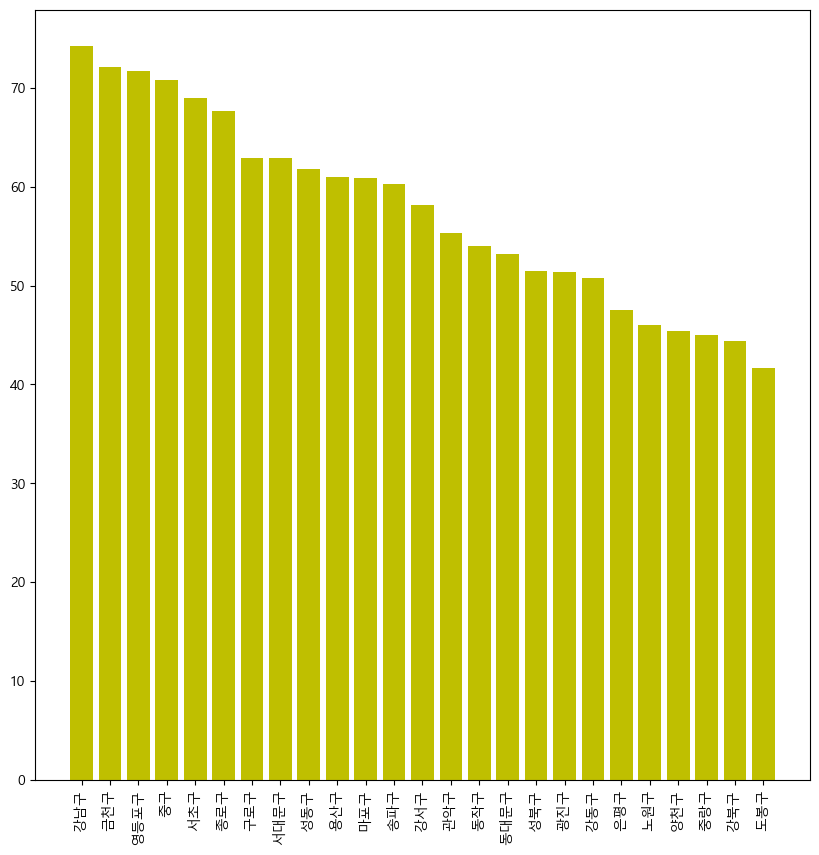

In [38]:
plt.figure(figsize=(10,10))
plt.bar(desti_gtw.index, desti_gtw.values, color='y')
plt.xticks(rotation=90)
plt.show()

#### ** 출근인원 수가 가장 많은 강남을 포함해서, 영등포구, 서초구 등도 출근인원이 많은데 출근소요시간도 긴 지역임을 알 수 있다.

In [39]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 16016624 entries, 0 to 16016623
Data columns (total 9 columns):
 #   Column       Non-Null Count     Dtype 
---  ------       --------------     ----- 
 0   대상연월         16016624 non-null  int64 
 1   요일           16016624 non-null  object
 2   성별           16016624 non-null  object
 3   나이           16016624 non-null  int64 
 4   평균 이동 시간(분)  16016624 non-null  int64 
 5   이동인구(합)      16016624 non-null  int64 
 6   출발 지역명       16016624 non-null  object
 7   도착 지역명       16016624 non-null  object
 8   인구수반영 총 시간   16016624 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.2+ GB


### 각 column 들에 대해 평균을 계산하는 중요한 데이터인 '이동시간' 의 위치 통계량 파악

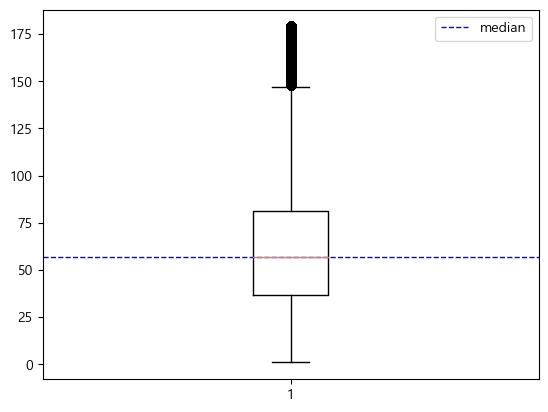

In [40]:
plt.boxplot(df['평균 이동 시간(분)'])
plt.axhline(y=57.0, color='b', linewidth=1, linestyle='--', label='median')
plt.legend()
plt.show()

In [41]:
np.median(df['평균 이동 시간(분)'])

57.0

In [42]:
(df['평균 이동 시간(분)'] * df['이동인구(합)']).sum() / df['이동인구(합)'].sum()

62.86928815903505

In [43]:
# 상사분위수
Q3 = np.quantile(df['평균 이동 시간(분)'],0.75)  
Q3

81.0

In [44]:
# 하사분위수
Q1 = np.quantile(df['평균 이동 시간(분)'], 0.25) 
Q1

37.0

In [45]:
u_whisker = Q3 + iqr(df['평균 이동 시간(분)']) * 1.5
u_whisker

147.0

#### ** 이동시간의 위치통계량(사분위수)를 파악 해 봄
- 이동시간의 중앙값은 57분정도로 평균인 63분과 크게 차이나지 않는다.(평균값을 대표값으로 활용하는것이 크게 문제되지 않는다)
- Q3-Q1로 계산되는 IQR 구간과 upper whisker, lower whisker간의 차이를 보았을 때
- 아래보다 위의 차이가 큰 것으로 보아, Q3 위로 분포한 출근시간이 많이 소요되는 사람들의 시간 분포가 더 넓게 형성 되어있다(아래쪽 데이터에 조금 더 무게중심이 치우친, 위쪽으로 꼬리가 있는 모양)는 것을 알 수 있으며
- upper whisker 값인 147분 이상의 값은 그래프에서 이상치로 분류될 만큼 일반적인 사람들 보다 긴 시간을 출근시간에 소요하고 있다는 것을 알 수 있다.

#### 바이올린 플롯으로 데이터 분포 모양을 한번 봐보자
- 데이터의 양이 많아서 한 곳에 같이 그리면 boxplot이 잘 안보임

<Axes: >

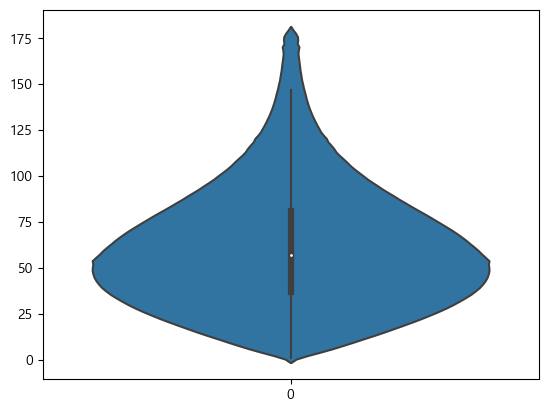

In [46]:
sns.violinplot(df['평균 이동 시간(분)'])

## ~column 별 데이터들을 간단하게 살펴본 결과의 정리 및 결론


### 결국은 각 column의 조건 별 출근 인원수와 평균적인 출근 소요시간의 차이가 있는지를 간단하게 살펴본 것

1. 요일별 출근인원수는 월,금에 비교적 적고 나머지는 비슷하며, 출근 소요시간의 차이는 없다. 일반적으로 월요일과 금요일에 연차를 많이 사용하는 상식과 통하는 결과
2. 성별에 따른 차이는 출근인원수는 적은 차이지만 여성이 더 많이 출근을 한다. 이는 제조업과 같이 남성 비율이 높은 기업들이 서울외 타 지역에 있는 경우가 많아서 그럴 것이라는 개인적인 추측. 출근 소요시간은 미세하지만 평균 5분정도 남성이 더 길게 소요한다.
3. 나이별 출근인원수는 25 ~ 54세의 사회활동을 가잘 활발이 하는 나이대라는 기존 상식과 맞아 떨어지는 결과. 출근 소요시간은 나이대가 높아질 수록 점점 줄어드는 경향. 20 ~ 24세는 대학생이 많아 자취와 기숙사 생활을 하는 경우가 있어 상대적으로 출근 소요시간이 짧다는 분석.
4. 대상연월별 column 은 데이터를 4 ~ 6월 3개월간의 데이터인데, 휴가철이나 연말 연초 데이터가 아니라 당연하게도 출근인원수와 출근 소요시간에서 어떠한 특이점도 없음.
<br><br><br>
5. 지역별 출근인원수는 강남구, 중구, 서초구, 영등포구, 송파구 순으로 많았으며, 출근 소요시간은 강남구, 금천구, 영등포구, 중구, 서초구 순으로 길었다. <b>해당 column에 대한 분석이 분석 방향에 가장 중요한 부분이며, 해당 컬럼에 대한 추가적인 시각화와 분석을 진행할 계획</b>

### 결론속의 결론
- 요일별, 성별, 나이별, 대상연월별 column은 기존 상식에서 벗어나지 않은 결과 (그래도 데이터를 통해 알고있는 것을 다시 확인하니 좋음)
- 지역별 차이를 중점적으로 시각화 및 분석예정

#### 다음 보고서에 지역별 차이를 중심으로 분석을 진행하겠습니다.

In [47]:
# df.to_csv('./data/서울생활이동_데이터살피기.csv')